Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


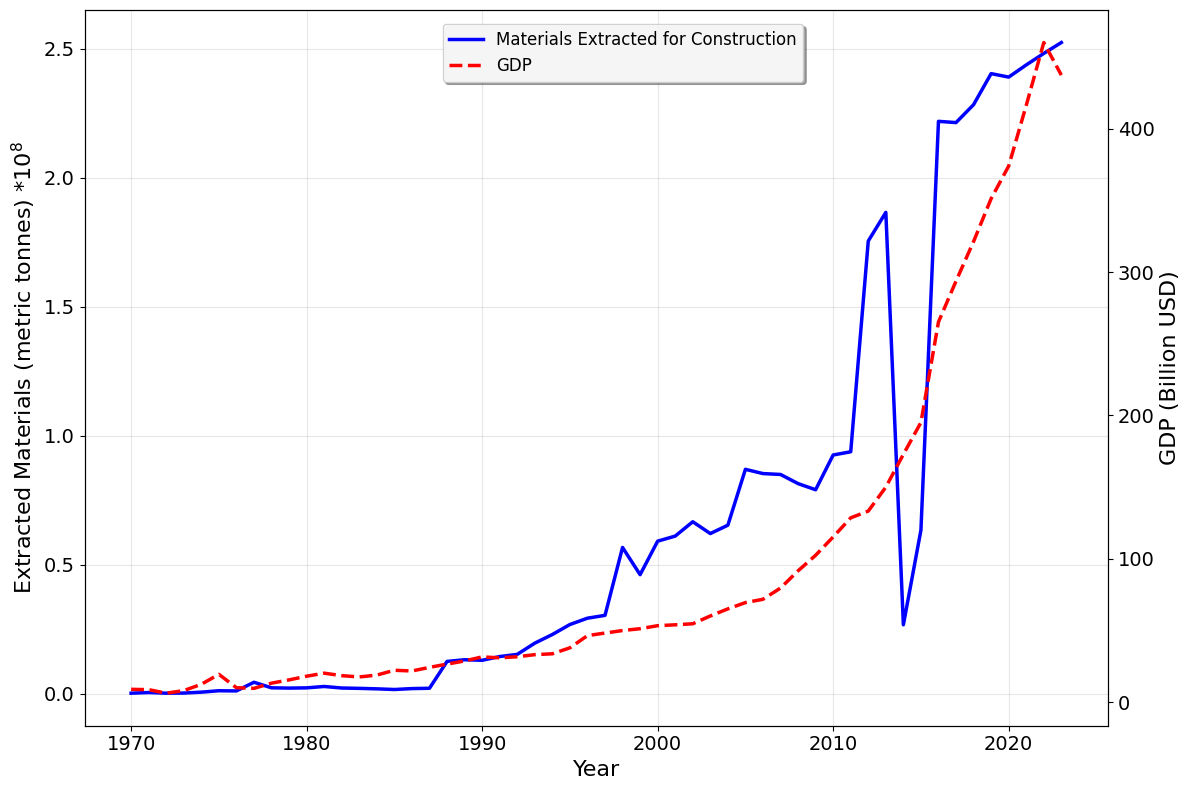

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file path
file_path = '/content/drive/MyDrive/colab/fig1_gdp/plot_gdpearth.xlsx'

# Load the data from the specified sheet
data = pd.read_excel(file_path, sheet_name='processed')

# Ensure column names match expectations (strip any leading/trailing spaces)
data.columns = data.columns.str.strip()

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 8))

# Define font and color settings
label_font_size = 16
title_font_size = 16
axis_font_color = 'black'

# Plot 'construction' on the primary y-axis
ax1.plot(data['year'], data['construction'], color='blue', label='Materials Extracted for Construction', linewidth=2.5)
ax1.set_xlabel('Year', fontsize=label_font_size, color=axis_font_color)
ax1.set_ylabel('Extracted Materials (metric tonnes) $*10^8$', fontsize=label_font_size, color=axis_font_color)
ax1.tick_params(axis='y', labelcolor=axis_font_color, labelsize=14)
ax1.tick_params(axis='x', labelcolor=axis_font_color, labelsize=14)
ax1.grid(alpha=0.3)

# Format the primary y-axis to scale by \(10^8\)
ax1.get_yaxis().get_major_formatter().set_scientific(False)
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e8:.1f}'))


# Create a secondary y-axis for 'gdp'
ax2 = ax1.twinx()
ax2.plot(data['year'], data['gdp'], color='red', label='GDP', linewidth=2.5, linestyle='--')
ax2.set_ylabel('GDP (Billion USD)', fontsize=label_font_size, color=axis_font_color)
ax2.tick_params(axis='y', labelcolor=axis_font_color, labelsize=14)

# Add legends with consistent formatting
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines + lines2,
    labels + labels2,
    loc=(0.35, 0.90),  # Adjust the location
    fontsize=12,      # Font size for the legend
    shadow=True,      # Add shadow
    fancybox=True,    # Enable rounded corners
    framealpha=0.9    # Adjust transparency of the legend box
)


# Set title
#plt.title('Growth of GDP and Extracted Materials for Construction', fontsize=title_font_size, color=axis_font_color, weight='bold')

# Save the plot in high resolution
output_file_path = '/content/drive/MyDrive/colab/fig1_gdp/fig1_gdp.png'
plt.tight_layout()
plt.savefig(output_file_path, dpi=600)  # Set dpi to 300 for high quality

# Show the plot
plt.show()
